In [1]:
# Required imports

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

ModuleNotFoundError: No module named 'qiskit_aer'

In [2]:
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Prepare ebit used for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier() 

# Alice's operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

# Alice measures and sends classical bits to Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

# Bob uses the classical bits to conditionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

display(protocol.draw())

░      ┌───┐ ░    ┌─┐ ░                                     »
  Q: ───────────░───■──┤ H ├─░────┤M├─░─────────────────────────────────────»
     ┌───┐      ░ ┌─┴─┐└───┘ ░ ┌─┐└╥┘ ░                                     »
  A: ┤ H ├──■───░─┤ X ├──────░─┤M├─╫──░─────────────────────────────────────»
     └───┘┌─┴─┐ ░ └───┘      ░ └╥┘ ║  ░ ┌────── ┌───┐ ───────┐ ┌────── ┌───┐»
  B: ─────┤ X ├─░────────────░──╫──╫──░─┤ If-0  ┤ X ├  End-0 ├─┤ If-0  ┤ Z ├»
          └───┘ ░            ░  ║  ║  ░ └──╥─── └───┘ ───────┘ └──╥─── └───┘»
                                ║  ║    ┌──╨──┐                   ║         »
a: 1/═══════════════════════════╩══╬════╡ 0x1 ╞═══════════════════╬═════════»
                                0  ║    └─────┘                ┌──╨──┐      »
b: 1/══════════════════════════════╩═══════════════════════════╡ 0x1 ╞══════»
                                   0                           └─────┘      »
«               
«  Q: ──────────
«               
«  A: ──────────
«      ───────┐ 
«  B:   End-0 ├─
«      ───────┘ 
«a: 1/══════════
«               
«b: 1/══════════
«

In [3]:
random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi,
)

display(random_gate.to_matrix())

array([[ 0.15240552+0.j        , -0.71554375+0.68174019j],
       [-0.86021888+0.48661692j, -0.04427778+0.14583183j]])

In [4]:
# Create a new circuit including the same bits and qubits used in the
# teleportation protocol.

test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Start with the randomly selected gate on Q

test.append(random_gate, qubit)
test.barrier()

# Append the entire teleportation protocol from above.

test = test.compose(protocol)
test.barrier()

# Finally, apply the inverse of the random unitary to B and measure.

test.append(random_gate.inverse(), ebit1)

result = ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(ebit1, result)

display(test.draw())

┌────────────────────────┐ ░            ░      ┌───┐ ░    ┌─┐ ░ »
       Q: ┤ U(2.8356,2.6268,5.522) ├─░────────────░───■──┤ H ├─░────┤M├─░─»
          └────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ ┌─┐└╥┘ ░ »
       A: ───────────────────────────░─┤ H ├──■───░─┤ X ├──────░─┤M├─╫──░─»
                                     ░ └───┘┌─┴─┐ ░ └───┘      ░ └╥┘ ║  ░ »
       B: ───────────────────────────░──────┤ X ├─░────────────░──╫──╫──░─»
                                     ░      └───┘ ░            ░  ║  ║  ░ »
     a: 1/════════════════════════════════════════════════════════╩══╬════»
                                                                  0  ║    »
     b: 1/═══════════════════════════════════════════════════════════╩════»
                                                                     0    »
Result: 1/════════════════════════════════════════════════════════════════»
                                                                          »
«                                                         ░ »
«       Q: ───────────────────────────────────────────────░─»
«                                                         ░ »
«       A: ───────────────────────────────────────────────░─»
«          ┌────── ┌───┐ ───────┐ ┌────── ┌───┐ ───────┐  ░ »
«       B: ┤ If-0  ┤ X ├  End-0 ├─┤ If-0  ┤ Z ├  End-0 ├──░─»
«          └──╥─── └───┘ ───────┘ └──╥─── └───┘ ───────┘  ░ »
«          ┌──╨──┐                   ║                      »
«     a: 1/╡ 0x1 ╞═══════════════════╬══════════════════════»
«          └─────┘                ┌──╨──┐                   »
«     b: 1/═══════════════════════╡ 0x1 ╞═══════════════════»
«                                 └─────┘                   »
«Result: 1/═════════════════════════════════════════════════»
«                                                           »
«                                          
«       Q: ────────────────────────────────
«                                          
«       A: ────────────────────────────────
«          ┌───────────────────────────┐┌─┐
«       B: ┤ U(-2.8356,-5.522,-2.6268) ├┤M├
«          └───────────────────────────┘└╥┘
«     a: 1/══════════════════════════════╬═
«                                        ║ 
«     b: 1/══════════════════════════════╬═
«                                        ║ 
«Result: 1/══════════════════════════════╩═
«                                        0

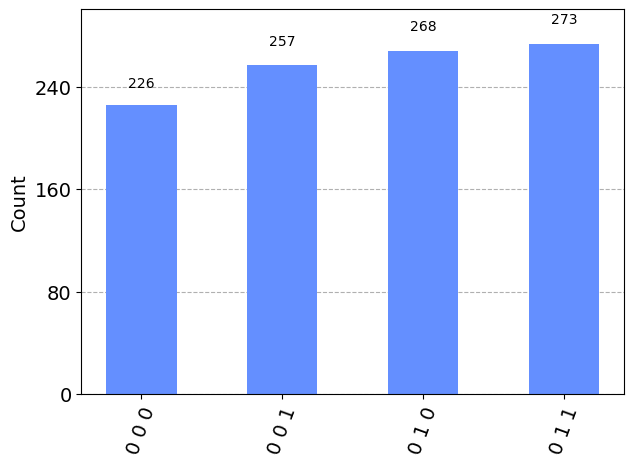

In [5]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

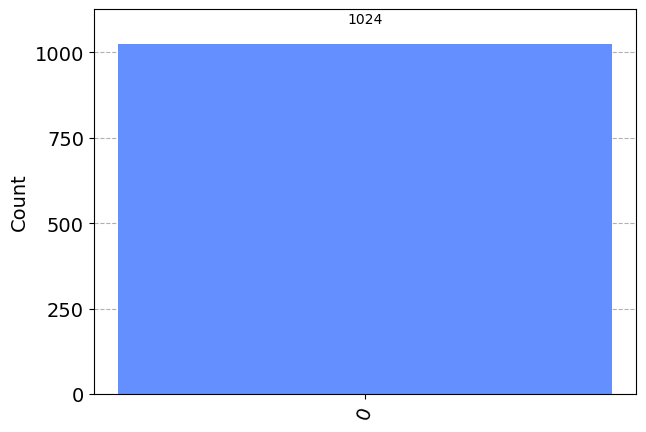

In [6]:
filtered_statistics = marginal_distribution(statistics, [2])
display(plot_histogram(filtered_statistics))

In [7]:
# Required imports

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer.primitives import Sampler
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [8]:
c = ClassicalRegister(1, "c")
d = ClassicalRegister(1, "d")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
result_c = ClassicalRegister(1, "res_c")
result_d = ClassicalRegister(1, "res_d")
randomizer = QuantumRegister(1, "Random")

superdense_coding = QuantumCircuit(ebit0, ebit1, c, d, result_c, result_d, randomizer)

superdense_coding.h(ebit1)
superdense_coding.cx(ebit1, ebit0)
superdense_coding.barrier()

superdense_coding.h(randomizer)
superdense_coding.measure(randomizer, c)
superdense_coding.h(randomizer)
superdense_coding.measure(randomizer, d)
superdense_coding.barrier()

with superdense_coding.if_test((d, 1)):
    superdense_coding.z(ebit1)
with superdense_coding.if_test((c, 1)):
    superdense_coding.x(ebit1)
superdense_coding.barrier()

superdense_coding.cx(ebit1, ebit0)
superdense_coding.h(ebit1)
superdense_coding.barrier()

superdense_coding.measure(ebit1, result_d)
superdense_coding.measure(ebit0, result_c)

display(superdense_coding.draw())

┌───┐ ░                  ░                                     »
      A: ─────┤ X ├─░──────────────────░─────────────────────────────────────»
         ┌───┐└─┬─┘ ░                  ░ ┌────── ┌───┐ ───────┐ ┌────── ┌───┐»
      B: ┤ H ├──■───░──────────────────░─┤ If-0  ┤ Z ├  End-0 ├─┤ If-0  ┤ X ├»
         └───┘      ░ ┌───┐┌─┐┌───┐┌─┐ ░ └──╥─── └───┘ ───────┘ └──╥─── └───┘»
 Random: ───────────░─┤ H ├┤M├┤ H ├┤M├─░────╫──────────────────────╫─────────»
                    ░ └───┘└╥┘└───┘└╥┘ ░    ║                   ┌──╨──┐      »
    c: 1/═══════════════════╩═══════╬═══════╬═══════════════════╡ 0x1 ╞══════»
                            0       ║    ┌──╨──┐                └─────┘      »
    d: 1/═══════════════════════════╩════╡ 0x1 ╞═════════════════════════════»
                                    0    └─────┘                             »
res_c: 1/════════════════════════════════════════════════════════════════════»
                                                                             »
res_d: 1/════════════════════════════════════════════════════════════════════»
                                                                             »
«                    ░ ┌───┐      ░    ┌─┐
«      A: ───────────░─┤ X ├──────░────┤M├
«          ───────┐  ░ └─┬─┘┌───┐ ░ ┌─┐└╥┘
«      B:   End-0 ├──░───■──┤ H ├─░─┤M├─╫─
«          ───────┘  ░      └───┘ ░ └╥┘ ║ 
« Random: ───────────░────────────░──╫──╫─
«                    ░            ░  ║  ║ 
«    c: 1/═══════════════════════════╬══╬═
«                                    ║  ║ 
«    d: 1/═══════════════════════════╬══╬═
«                                    ║  ║ 
«res_c: 1/═══════════════════════════╬══╩═
«                                    ║  0 
«res_d: 1/═══════════════════════════╩════
«                                    0

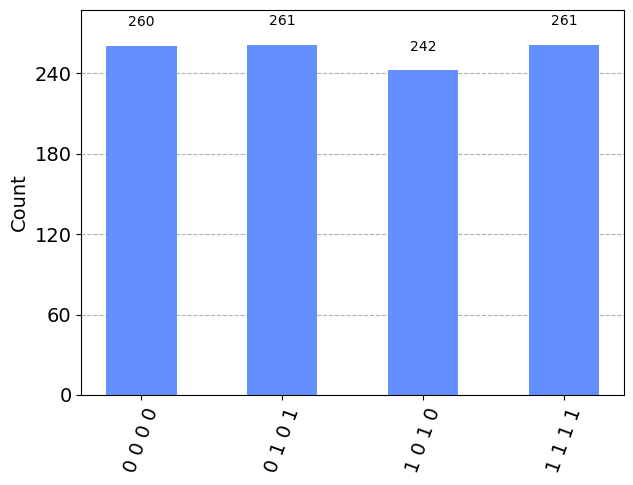

: 

In [15]:
result = AerSimulator().run(superdense_coding).result()
statistics = result.get_counts()
display(plot_histogram(statistics))